In [5]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [70]:
# Raw Data of Species and their current status.
df = pd.read_csv(r"C:\Users\monee\OneDrive\Documents\species_info.csv")
df.drop_duplicates(subset=['scientific_name'])
df
## After making sure there aren't duplicates, table shows that there are 5824 recorded species.

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


In [7]:
## Next is to find out how many different types of species are in the dataset

In [28]:
nos_df = df.groupby(['category'], as_index=False)['scientific_name'].count()
sorted_values = nos_df.sort_values('scientific_name')
sorted_values

## The results show that there are 7 types of species recorded and how many.
    # Amphibian, Bird, Fish, Mammal, Nonvascular Plant, Reptile, Vascular Plant

,category,scientific_name
5,Reptile,79
0,Amphibian,80
2,Fish,127
3,Mammal,214
4,Nonvascular Plant,333
1,Bird,521
6,Vascular Plant,4470


In [9]:
## Visual Chart of the number of species that are in each category from above results.

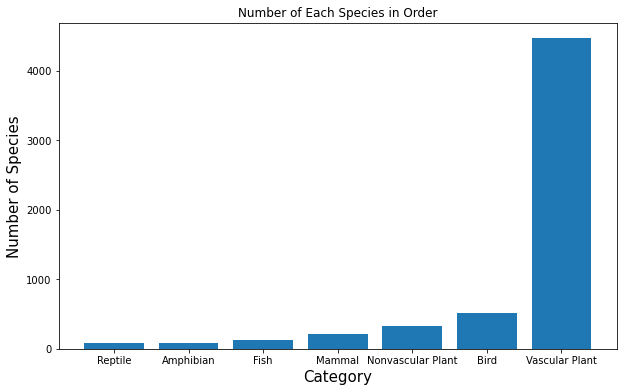

In [33]:
plt.figure(figsize=(10,6))
plt.bar(sorted_values['category'],sorted_values['scientific_name'])
plt.xlabel('Category', size = 15)
plt.ylabel('Number of Species', size=15)
plt.title('Number of Each Species in Order')
plt.savefig("num_of_each_species_bchart.png")
plt.show()

## This bar chart visually shows Vascular Plants being the most recorded with Reptile and then Amphibians being the least.

In [35]:
status_df =df.groupby(['conservation_status'], as_index=False)['category'].count()
status_df
# Records are missing in these results because null values cannot be read. 
# Therefore, null values in 'conservation_status need to be updated.'

,conservation_status,category
0,Endangered,16
1,In Recovery,4
2,Species of Concern,161
3,Threatened,10


In [61]:
## Getting rid of Null values in dataframe.

df['conservation_status'] = df['conservation_status'].fillna('Stable')
# Now that Null Values are gone in 'conservation_status', we can repeat execution above.

new_stat = status_df.sort_values('category')
new_stat

# Results show that the majority of recorded species are stable and the least are in recovery

,conservation_status,category
1,In Recovery,4
4,Threatened,10
0,Endangered,16
2,Species of Concern,161
3,Stable,5633


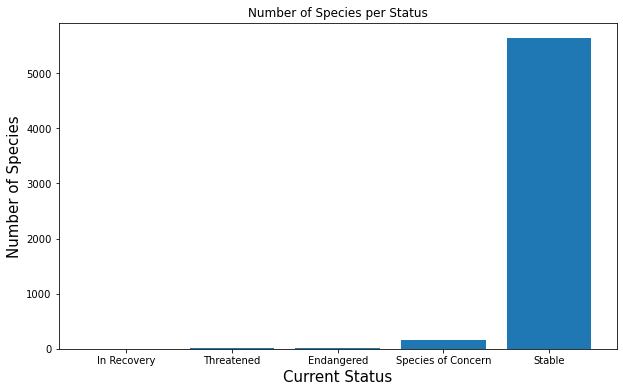

In [69]:
## Visual of number of species in each status.

plt.figure(figsize=(10,6))
plt.bar(new_stat['conservation_status'],new_stat['category'])
plt.xlabel('Current Status', size = 15)
plt.ylabel('Number of Species', size=15)
plt.title('Number of Species per Status')
plt.savefig("nos_status_bchart.png")
plt.show()

In [64]:
## The analyst between the first two graphs suggest that the majority of recorded species are Vascular Plants and are stable.
## This gives an obvious conclusion that most stable species are Vascular Plants.
## Now that we know this. Let's find out what species are most likely to be Endangered/Threatened

In [71]:
conservationCategory = df.groupby(["conservation_status", "category"])['scientific_name'].count()
conservationCategory

conservation_status  category         
Endangered           Amphibian             1
                     Bird                  4
                     Fish                  3
                     Mammal                7
                     Vascular Plant        1
In Recovery          Bird                  3
                     Mammal                1
Species of Concern   Amphibian             4
                     Bird                 72
                     Fish                  4
                     Mammal               28
                     Nonvascular Plant     5
                     Reptile               5
                     Vascular Plant       43
Threatened           Amphibian             2
                     Fish                  4
                     Mammal                2
                     Vascular Plant        2
Name: scientific_name, dtype: int64

In [4]:
df2 = pd.read_csv(r"C:\Users\monee\OneDrive\Documents\observations.csv")
df2.drop_duplicates(subset=['scientific_name'])
df2
# Cleaned Data of Observations

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


Text(0.5, 1.0, 'Total Species per Status')

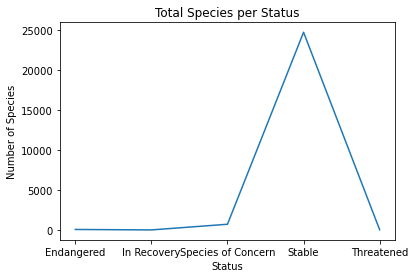

In [7]:
bar_x = status_df['conservation_status']
bar_y = status_df['category']
plt.plot(bar_x,bar_y)
plt.ylabel('Number of Species')
plt.xlabel('Status')

plt.title('Total Species per Status')


In [8]:
named_species = new_df.groupby(['category'], as_index=False)['scientific_name'].count()
named_species
#Counting how many recorded species are there in each category

,category,scientific_name
0,Amphibian,328
1,Bird,2364
2,Fish,524
3,Mammal,1200
4,Nonvascular Plant,1332
5,Reptile,324
6,Vascular Plant,19560


In [9]:
park_specNum = new_df.groupby(['park_name'], as_index=False)['category'].count()
park_specNum

,park_name,category
0,Bryce National Park,6408
1,Great Smoky Mountains National Park,6408
2,Yellowstone National Park,6408
3,Yosemite National Park,6408


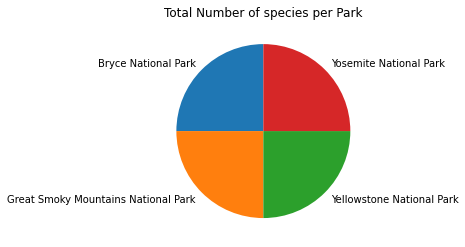

In [10]:
parks = ["Bryce National Park", "Great Smoky Mountains National Park", "Yellowstone National Park", "Yosemite National Park"]
numof_spec = [6408,6408,6408,6408]

plt.pie(numof_spec, labels=parks,startangle=90)
plt.title('Total Number of species per Park')
plt.show()

In [11]:
park_status = new_df.groupby(['conservation_status','park_name','category'], as_index=False)['scientific_name'].count()
park_status

,conservation_status,park_name,category,scientific_name
0,Endangered,Bryce National Park,Amphibian,1
1,Endangered,Bryce National Park,Bird,4
2,Endangered,Bryce National Park,Fish,3
3,Endangered,Bryce National Park,Mammal,11
4,Endangered,Bryce National Park,Vascular Plant,1
...,...,...,...,...
95,Threatened,Yellowstone National Park,Vascular Plant,2
96,Threatened,Yosemite National Park,Amphibian,2
97,Threatened,Yosemite National Park,Fish,5
98,Threatened,Yosemite National Park,Mammal,2


In [39]:
vas_plants= df.loc[df['category']=='Vascular Plant']
vas_plants

,category,scientific_name,common_names,conservation_status
574,Vascular Plant,Acorus calamus,Sweetflag,Stable
575,Vascular Plant,Alisma subcordatum,Water-Plantain,Stable
576,Vascular Plant,Sagittaria australis,Longbeak Arrowhead,Stable
577,Vascular Plant,Sagittaria latifolia var. pubescens,Broad-Leaved Arrowhead,Stable
578,Vascular Plant,Arisaema dracontium,Green Dragon,Stable
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,Stable
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",Stable
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",Stable
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",Stable


In [41]:
birds_df= df.loc[df['category']=='Bird']
birds_df

,category,scientific_name,common_names,conservation_status
90,Bird,Vermivora pinus X chrysoptera,Brewster's Warbler,Stable
91,Bird,Accipiter cooperii,Cooper's Hawk,Species of Concern
92,Bird,Accipiter gentilis,Northern Goshawk,Stable
93,Bird,Accipiter striatus,Sharp-Shinned Hawk,Species of Concern
94,Bird,Aquila chrysaetos,Golden Eagle,Species of Concern
...,...,...,...,...
4571,Bird,Glaucidium gnoma,Northern Pygmy Owl,Stable
4572,Bird,Otus flammeolus,Flammulated Owl,Stable
4573,Bird,Strix nebulosa,Great Gray Owl,Stable
4574,Bird,Strix occidentalis,Spotted Owl,Stable


In [43]:
nonVas_plants= df.loc[df['category']=='Nonvascular Plant']
nonVas_plants

,category,scientific_name,common_names,conservation_status
2679,Nonvascular Plant,Andreaea rothii,Roth's Andreaea Moss,Stable
2680,Nonvascular Plant,Andreaea rupestris,Andreaea Moss,Stable
2681,Nonvascular Plant,Bartramia pomiformis,Bartramia Moss,Stable
2682,Nonvascular Plant,Philonotis fontana,Philonotis Moss,Stable
2683,Nonvascular Plant,Philonotis fontana var. pumila,Philonotis Moss,Stable
...,...,...,...,...
3007,Nonvascular Plant,Sphagnum squarrosum,Sphagnum,Stable
3008,Nonvascular Plant,Sphagnum subsecundum,Sphagnum,Stable
3009,Nonvascular Plant,Tetraphis pellucida,Tetraphis Moss,Stable
3010,Nonvascular Plant,Tetrodontium brownianum,Brown's Tetrodontium Moss,Stable


In [48]:
amphib_df= df.loc[df['category']=='Amphibian']
amphib_df

amphib_status = amphib_df.groupby(['conservation_status'], as_index=False)['category'].count()
amphib_status

,conservation_status,category
0,Endangered,1
1,Species of Concern,4
2,Stable,73
3,Threatened,2


In [49]:
reptile_df= df.loc[df['category']=='Reptile']


reptile_status = reptile_df.groupby(['conservation_status'], as_index=False)['category'].count()
reptile_status

,conservation_status,category
0,Species of Concern,5
1,Stable,74


In [47]:
fish_df= df.loc[df['category']=='Fish']
fish_df

fish_status = fish_df.groupby(['conservation_status'], as_index=False)['category'].count()
fish_status

,conservation_status,category
0,Endangered,3
1,Species of Concern,4
2,Stable,116
3,Threatened,4


In [ ]:
mammals_df= df.loc[df['category']=='Mammal']
mammals_df

mammal_status = mammals_df.groupby(['conservation_status'], as_index=False)['category'].count()
mammal_status

In [44]:
nonVas_status = nonVas_plants.groupby(['conservation_status'], as_index=False)['category'].count()
nonVas_status

,conservation_status,category
0,Species of Concern,5
1,Stable,328


In [42]:
bird_status = birds_df.groupby(['conservation_status'], as_index=False)['category'].count()
bird_status
#BIRD Status

,conservation_status,category
0,Endangered,4
1,In Recovery,3
2,Species of Concern,72
3,Stable,442


In [40]:
vas_status = vas_plants.groupby(['conservation_status'], as_index=False)['category'].count()
vas_status
#VASCULAR PLANT status

,conservation_status,category
0,Endangered,1
1,Species of Concern,43
2,Stable,4424
3,Threatened,2


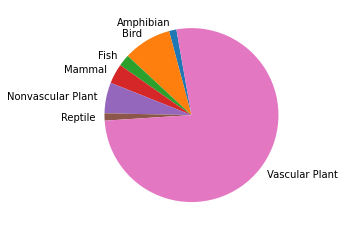

In [7]:
species = ["Amphibian", "Bird", "Fish", "Mammal","Nonvascular Plant","Reptile", "Vascular Plant"]
number = [80,521,127,214,333,79,4470]

plt.pie(number, labels=species,startangle=100)
plt.show()

#Pie chart and graph shows that the majority of recorded species are Vascular Plants

In [17]:

 
# Data of observations recorded of species at National Parks

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


In [18]:
o_df = observations_df.groupby(['park_name'], as_index=False)['scientific_name'].count()
o_df
#Chart of how many species are at each park

,park_name,scientific_name
0,Bryce National Park,5824
1,Great Smoky Mountains National Park,5824
2,Yellowstone National Park,5824
3,Yosemite National Park,5824


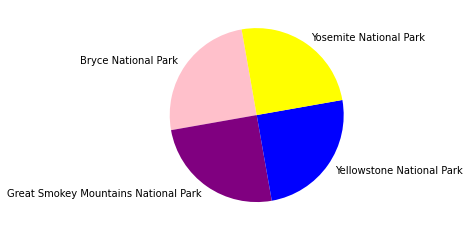

In [19]:
parks = ["Bryce National Park", "Great Smokey Mountains National Park", "Yellowstone National Park", "Yosemite National Park"]
animals = [5824,5824,5824,5824]

plt.pie(animals, labels=parks, colors=["pink","purple","blue","yellow"],startangle=100)
plt.show()
# Chart shows that species are divided evenly at each park

In [20]:
total_observ = observations_df['observations'].sum()
total_observ

3314739

In [22]:
average_observ = observations_df['observations'].mean()
average_observ

142.28790350274724

In [5]:
new_df = pd.merge(df, df2, how="outer", on=["scientific_name"])
new_df

# Creating an Outer join of both tables by scientfic name to get park location

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Stable,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Stable,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Stable,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Stable,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",Stable,Yosemite National Park,128
...,...,...,...,...,...,...
25627,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",Stable,Yellowstone National Park,237
25628,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",Stable,Great Smoky Mountains National Park,50
25629,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",Stable,Yellowstone National Park,239
25630,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",Stable,Bryce National Park,111
